In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df = pd.read_csv("Algerian_forest_fires_dataset.csv")

In [5]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


Data Cleaning

In [6]:
df.isnull().sum()

day            1
month          2
year           2
Temperature    2
 RH            2
 Ws            2
Rain           2
FFMC           2
DMC            2
DC             2
ISI            2
BUI            2
FWI            2
Classes        3
dtype: int64

In [7]:
df[df.isnull().any(axis = 1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [8]:
df.loc[:122 , "Region"] = 0
df.loc[122: , "Region"] = 1

In [9]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0.0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0.0
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          246 non-null    object 
 1   month        245 non-null    object 
 2   year         245 non-null    object 
 3   Temperature  245 non-null    object 
 4    RH          245 non-null    object 
 5    Ws          245 non-null    object 
 6   Rain         245 non-null    object 
 7   FFMC         245 non-null    object 
 8   DMC          245 non-null    object 
 9   DC           245 non-null    object 
 10  ISI          245 non-null    object 
 11  BUI          245 non-null    object 
 12  FWI          245 non-null    object 
 13  Classes      244 non-null    object 
 14  Region       247 non-null    float64
dtypes: float64(1), object(14)
memory usage: 29.1+ KB


In [11]:
df['Region'] = df['Region'].astype(int)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
 14  Region       247 non-null    int32 
dtypes: int32(1), object(14)
memory usage: 28.1+ KB


In [13]:
df.dropna(inplace = True)

In [14]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [15]:
df.reset_index()

,index,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,242,26,9,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,1
240,243,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,1
241,244,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
242,245,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [16]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
124,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,1


In [17]:
df.drop_duplicates(inplace = True)

In [18]:
df.reset_index(inplace = True , drop = True)

In [19]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,1


In [20]:
df = df.drop(index = 122).reset_index(drop = True)

In [21]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1


In [22]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    object
 1   month        243 non-null    object
 2   year         243 non-null    object
 3   Temperature  243 non-null    object
 4    RH          243 non-null    object
 5    Ws          243 non-null    object
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    int32 
dtypes: int32(1), object(14)
memory usage: 27.7+ KB


In [24]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [25]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

Here we can observe that there are spaces in the column names in 
RH , Ws , Classes which can create issues while using as column names.
So strip off the spaces.

In [26]:
df.columns = df.columns.str.strip()

In [27]:
df[['day','month','year','Temperature','RH','Ws']] = df[['day','month','year','Temperature','RH','Ws']].astype(int)

In [28]:
objects = [features for features in df.columns if df[features].dtypes == 'O']

In [29]:
for i in objects:
    if i != 'Classes':
        df[i] = df[i].astype(float)

EDA

In [30]:
df.to_csv('Algerian_forest_fires_cleaned_dataset.csv')

In [31]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [32]:
df['Classes'].value_counts()

fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: Classes, dtype: int64

In [33]:
df['Classes'] = df['Classes'].str.strip()

In [34]:
df['Classes'].value_counts()

fire        137
not fire    106
Name: Classes, dtype: int64

In [35]:
#changing classes column into numerical features
df_copy = df.copy()
df_copy['Classes'] = np.where(df_copy['Classes'] == 'not fire' , 0 , 1)

In [36]:
#dropping the features day,month and year as they are of no use.

df_copy.drop(['day','month','year'] ,axis = 1 , inplace = True)

C:\Users\vnkta\AppData\Local\Temp\ipykernel_13284\1261234368.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


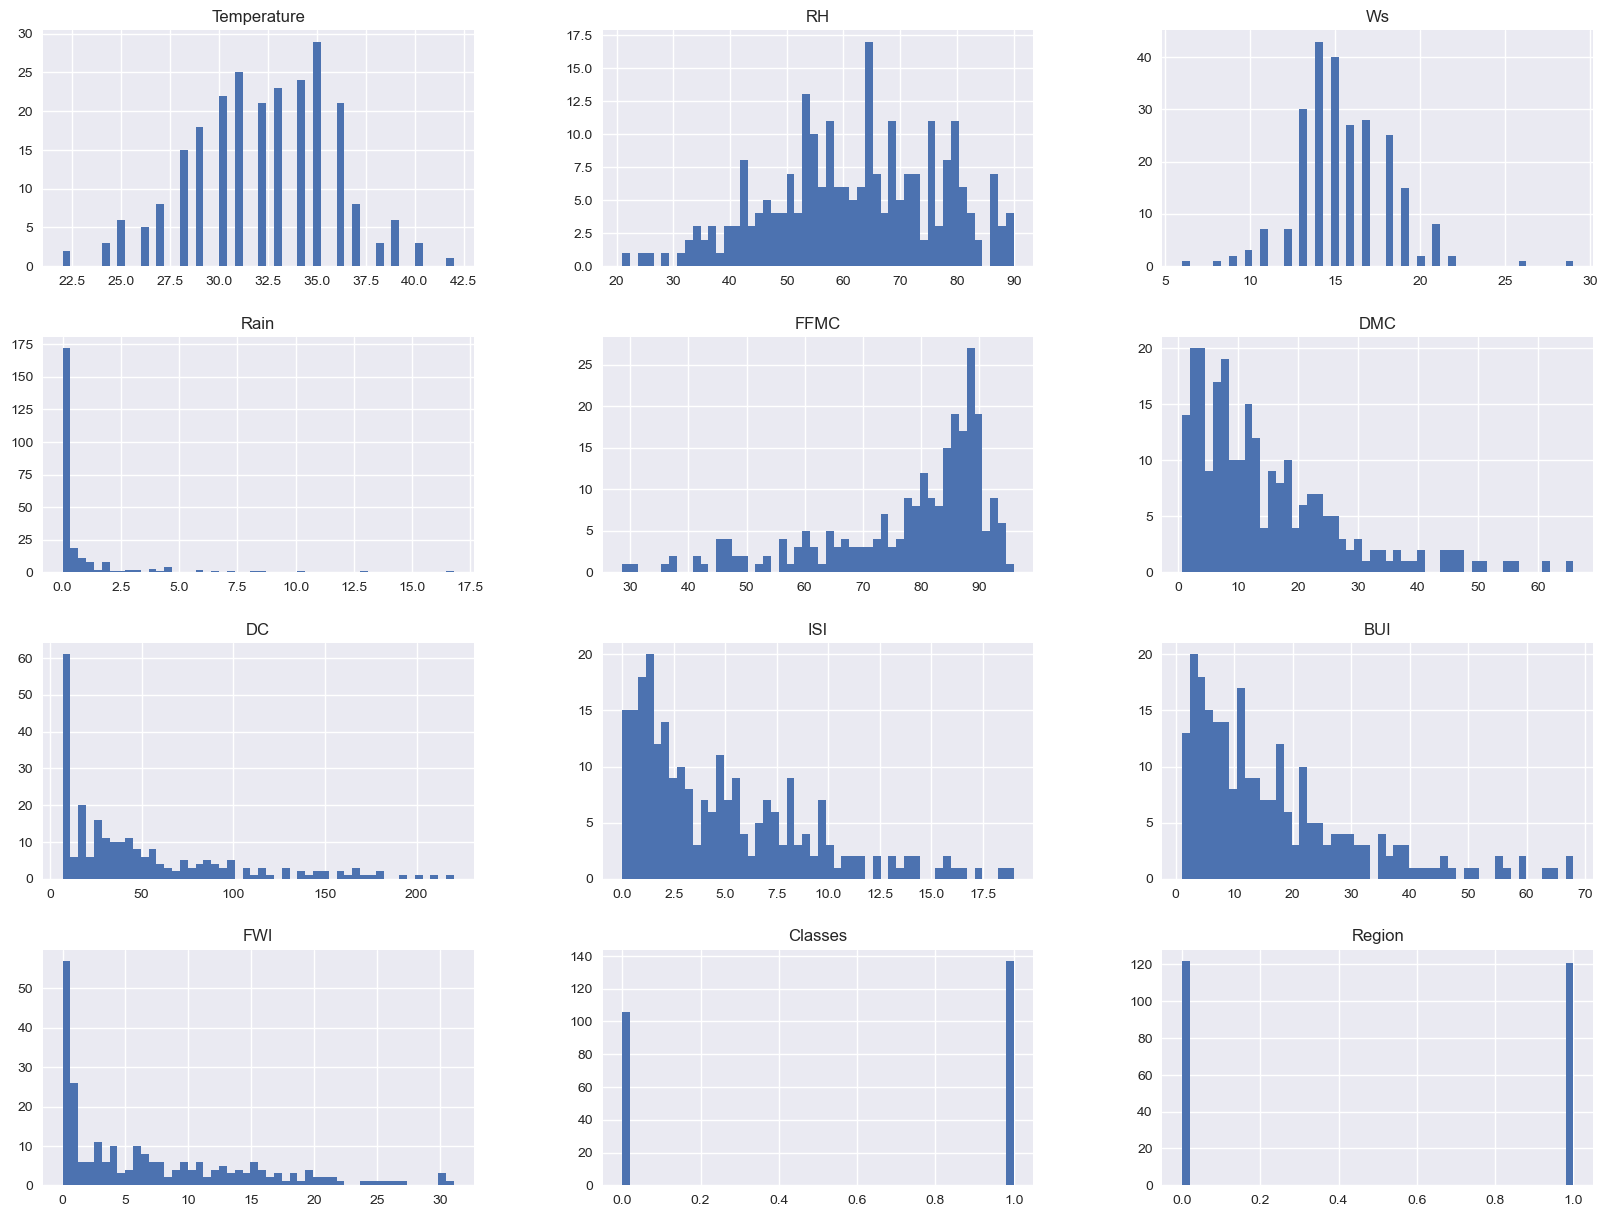

In [37]:
#density plot
plt.style.use('seaborn')
df_copy.hist(bins = 50 , figsize = (20,15))
plt.show()

In [38]:
#plotting pie chart to view the classes percentage
percentages = df_copy['Classes'].value_counts(normalize=True)*100
percentages

1    56.378601
0    43.621399
Name: Classes, dtype: float64

([<matplotlib.patches.Wedge at 0x1f0244be810>,
 [Text(-0.21895639684834634, 1.0779879852202388, 'not fire'),
  Text(0.21895649777686463, -1.0779879647200568, 'fire')],
 [Text(-0.1194307619172798, 0.5879934464837665, '56.4'),
  Text(0.11943081696919887, -0.587993435301849, '43.6')])

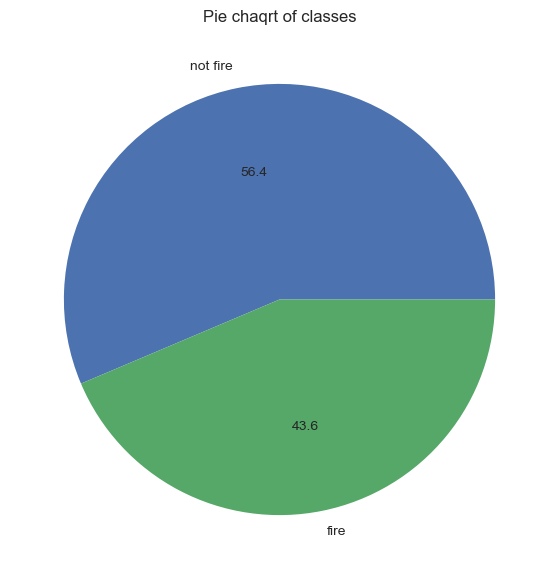

In [39]:
plt.figure(figsize = (12,7))
plt.title("Pie chaqrt of classes")
labels = ['not fire' , 'fire']
plt.pie(percentages , autopct='%1.1f' , labels = labels , startangle=0)

<Axes: >

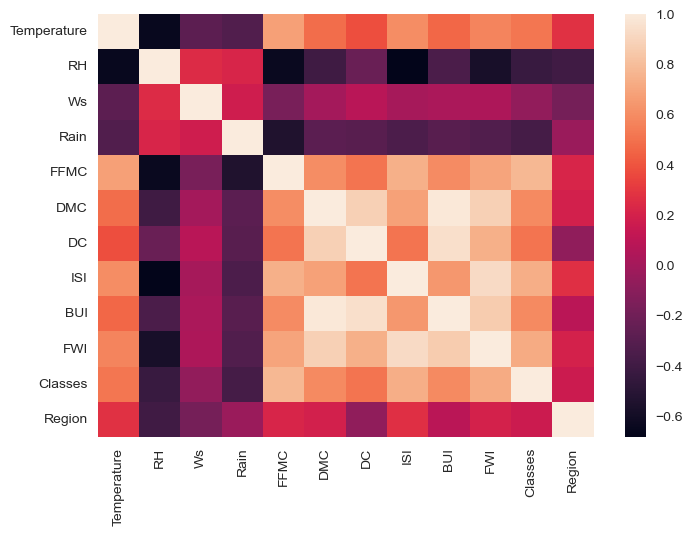

In [40]:
sns.heatmap(df_copy.corr())

<Axes: >

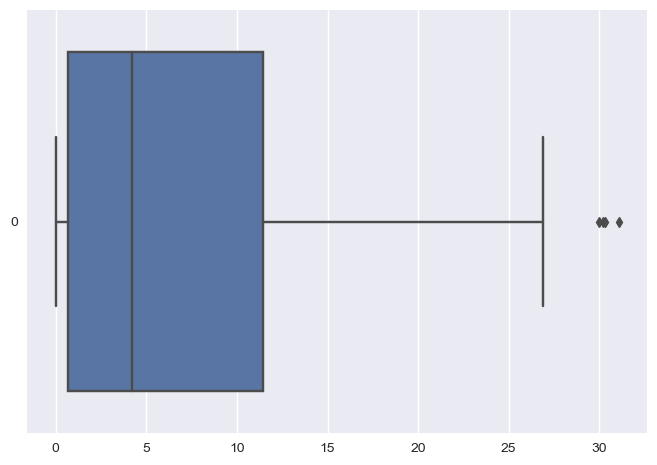

In [41]:
sns.boxplot(df_copy['FWI'] , orient = 'h')

In [42]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


Text(0.5, 1.0, 'Fire analysis of Sidi-Bel Region')

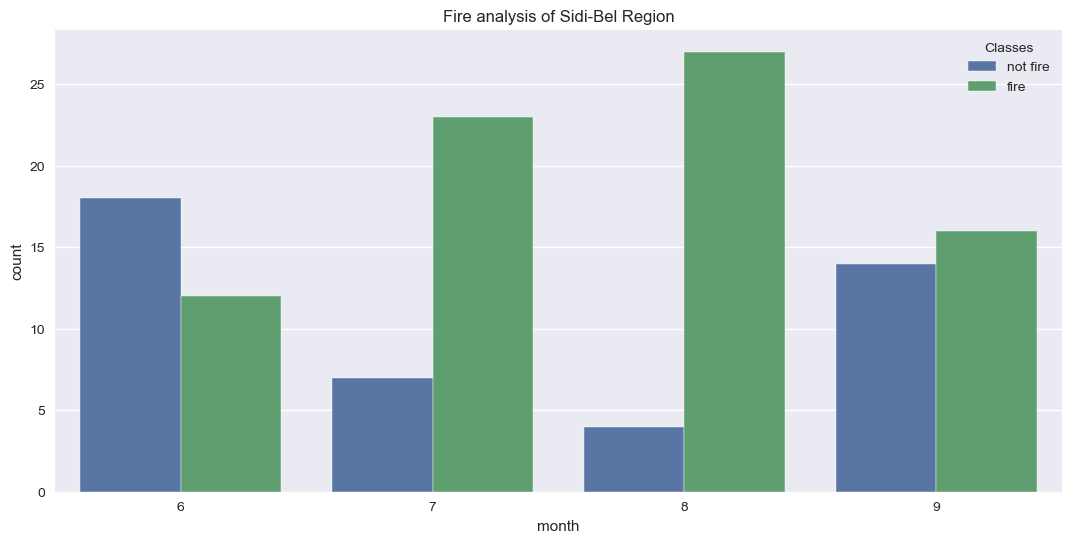

In [43]:
# monthly fire analysis
dftemp = df.loc[df['Region'] == 1]
plt.subplots(figsize = (13,6))
sns.set_style('whitegrid')
sns.countplot(x = 'month', hue = 'Classes' , data = dftemp)
plt.title('Fire analysis of Sidi-Bel Region')

Text(0.5, 1.0, 'Fire analysis of Bejaia Region')

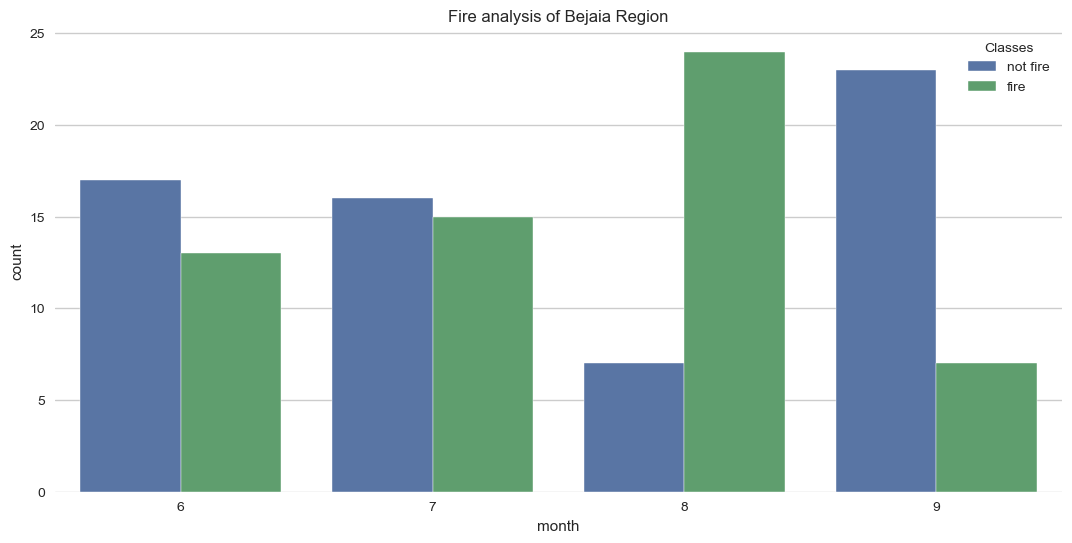

In [44]:
# monthly fire analysis
dftemp = df.loc[df['Region'] == 0]
plt.subplots(figsize = (13,6))
sns.set_style('whitegrid')
sns.countplot(x = 'month', hue = 'Classes' , data = dftemp)
plt.title('Fire analysis of Bejaia Region')

Model Training

In [45]:
df = pd.read_csv('Algerian_forest_fires_cleaned_dataset.csv')

In [46]:
df.head()

,Unnamed: 0,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [47]:
df.drop('Unnamed: 0' , axis = 1 , inplace = True)
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [48]:
df.drop(['year' , 'month' , 'day'] , axis = 1 , inplace = True)

In [49]:
df['Classes'] = np.where(df['Classes'] == 'not fire' , 0 , 1)

In [50]:
df.tail()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,1,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,1,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,1,1
242,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,1,1


In [51]:
#Splitting dependant and independent variables

x = df.drop('FWI' , axis = 1)
y = df['FWI']

In [52]:
from sklearn.model_selection import train_test_split as tts

In [53]:
x_train , x_test , y_train , y_test = tts(x , y, test_size=0.25 , random_state = 42)

In [54]:
x_train.shape , x_test.shape

((182, 11), (61, 11))

In [55]:
#checking for multicollinearity
x_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.082757,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.087991,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.153052,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.555691,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.130475,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.035565,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.063040,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.072611,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.043624,0.114897
Classes,0.082757,-0.087991,-0.153052,-0.555691,0.130475,0.035565,0.063040,0.072611,0.043624,1.000000,0.073517


<Axes: >

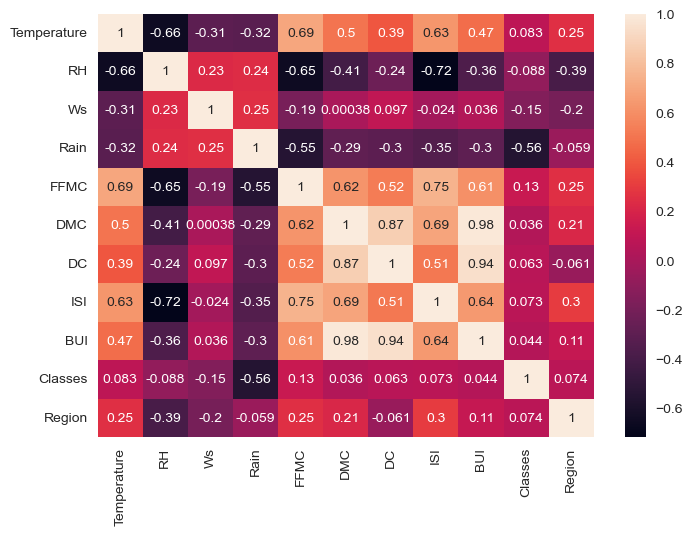

In [56]:
sns.heatmap(x_train.corr() , annot = True)

In [57]:
def correlation(dataset , threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                col_corr.add(corr_matrix.columns[i])

    return col_corr

In [58]:
corr_columns = correlation(x_train , 0.85)

In [59]:
#dropping these columns whose correlation is above the threshold value
x_train.drop(corr_columns , axis = 1 , inplace = True)
x_test.drop(corr_columns , axis = 1 , inplace = True)

Standardization

In [60]:
from sklearn.preprocessing import StandardScaler

In [61]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

Linear Regression

0.6243545806750511
0.9810792638577267


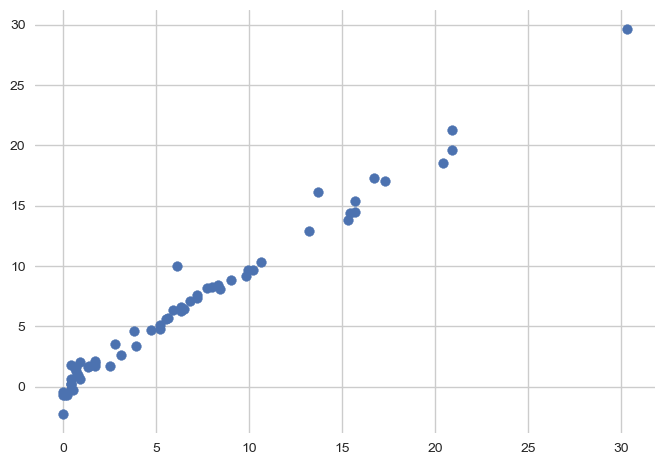

In [62]:
from sklearn.linear_model import LinearRegression as lr
from sklearn.metrics import r2_score , mean_absolute_error
regressor = lr()
regressor.fit(x_train_scaled , y_train)
y_predict = regressor.predict(x_test_scaled)
print(mean_absolute_error(y_test , y_predict))
print(r2_score(y_test , y_predict))
plt.scatter(y_test , y_predict) #if the plot is linear, the model is accurate

Lasso Regression

1.1331759949144085
0.9492020263112388


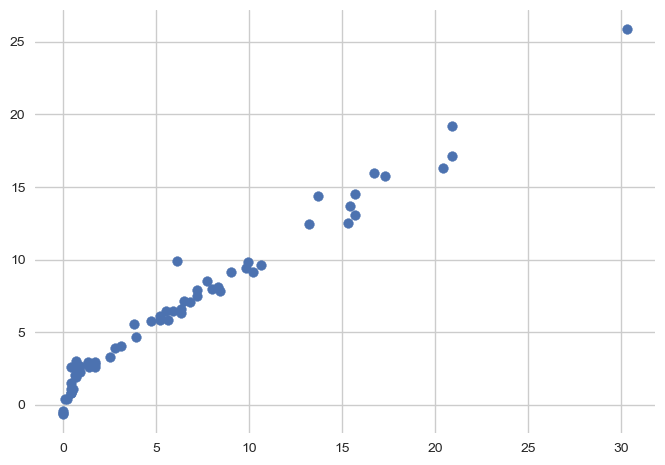

In [63]:
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score , mean_absolute_error
regressor = Lasso()
regressor.fit(x_train_scaled , y_train)
y_predict = regressor.predict(x_test_scaled)
print(mean_absolute_error(y_test , y_predict))
print(r2_score(y_test , y_predict))
plt.scatter(y_test , y_predict) #if the plot is linear, the model is accurate

Lasso CV

0.6393643744224451
0.9808658397081832


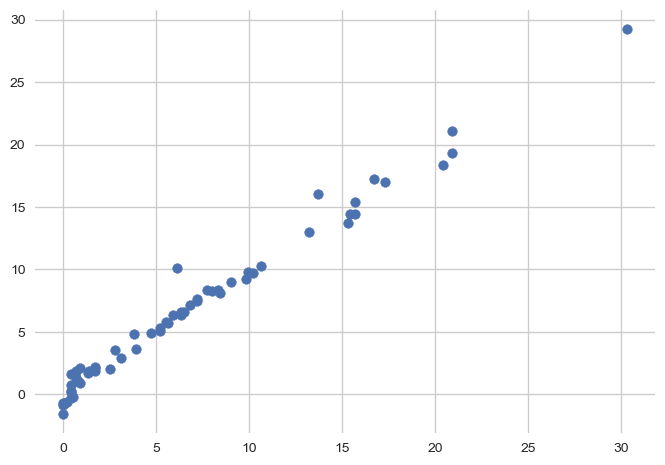

In [64]:
from sklearn.linear_model import LassoCV
from sklearn.metrics import r2_score , mean_absolute_error
regressor = LassoCV(cv = 5)
regressor.fit(x_train_scaled , y_train)
y_predict = regressor.predict(x_test_scaled)
print(mean_absolute_error(y_test , y_predict))
print(r2_score(y_test , y_predict))
plt.scatter(y_test , y_predict) #if the plot is linear, the model is accurate

Ridge Regression

0.6393457990459668
0.9803873023084119


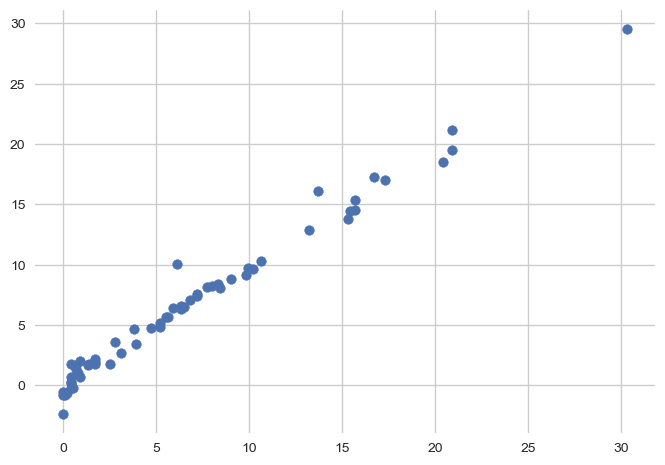

In [65]:
from sklearn.linear_model import Ridge 
from sklearn.metrics import r2_score , mean_absolute_error
ridge = Ridge()
ridge.fit(x_train_scaled , y_train)
y_predict = ridge.predict(x_test_scaled)
print(mean_absolute_error(y_test , y_predict))
print(r2_score(y_test , y_predict))
plt.scatter(y_test , y_predict) #if the plot is linear, the model is accurate

Ridge CV

0.639345799046115
0.9803873023083965


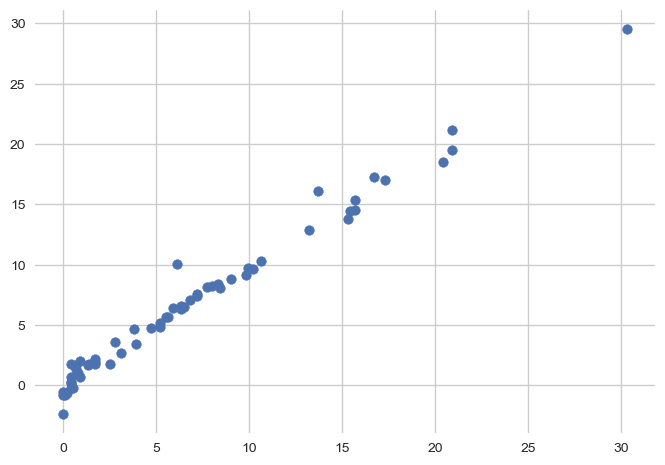

In [66]:
from sklearn.linear_model import RidgeCV
from sklearn.metrics import r2_score , mean_absolute_error
regressor = RidgeCV()
regressor.fit(x_train_scaled , y_train)
y_predict = regressor.predict(x_test_scaled)
print(mean_absolute_error(y_test , y_predict))
print(r2_score(y_test , y_predict))
plt.scatter(y_test , y_predict) #if the plot is linear, the model is accurate

ElasticNet Regression

1.9284414511796732
0.868664603256521


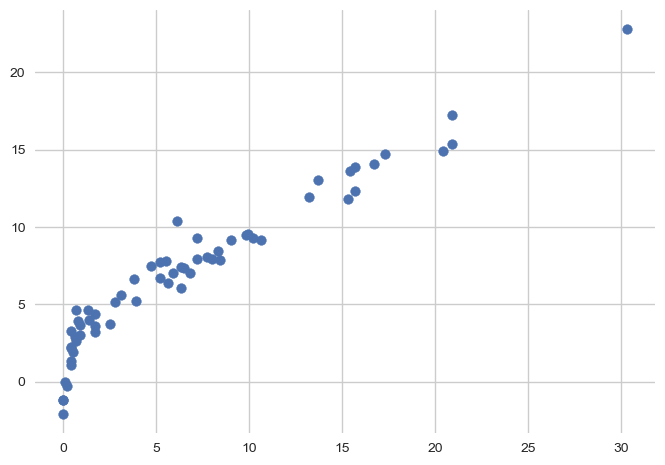

In [67]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score , mean_absolute_error
regressor = ElasticNet()
regressor.fit(x_train_scaled , y_train)
y_predict = regressor.predict(x_test_scaled)
print(mean_absolute_error(y_test , y_predict))
print(r2_score(y_test , y_predict))
plt.scatter(y_test , y_predict) #if the plot is linear, the model is accurate

ElasticNet CV

0.6978614539848234
0.977948840415349


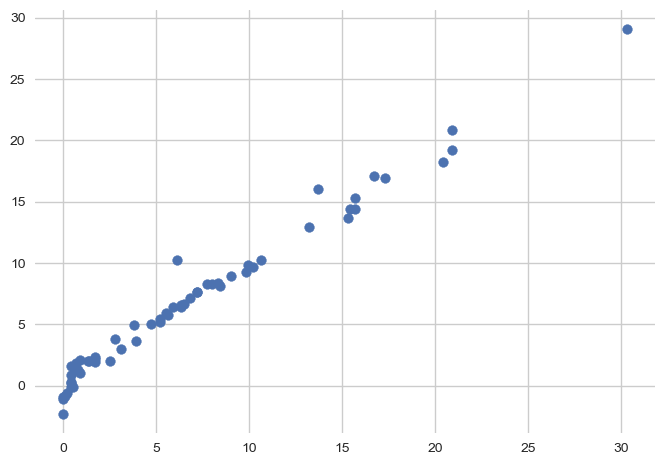

In [68]:
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import r2_score , mean_absolute_error
regressor = ElasticNetCV()
regressor.fit(x_train_scaled , y_train)
y_predict = regressor.predict(x_test_scaled)
print(mean_absolute_error(y_test , y_predict))
print(r2_score(y_test , y_predict))
plt.scatter(y_test , y_predict) #if the plot is linear, the model is accurate

Pickling the model

In [69]:
import pickle
pickle.dump(scaler , open('scaler.pkl' , 'wb'))
pickle.dump(ridge , open('ridge.pkl' , 'wb'))